### We read in the data

In [1]:
#import sklearn

#print(sklearn.__version__)

# update
# pip install --upgrade scikit-learn

1.0.2


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics


day_hour_count = pd.read_csv("../data/bikeshare_hour_count.csv")
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
5,0.5,16.0,23.0,20.0,25.0,52.0,70.0,58.0
6,0.6,21.0,14.0,22.0,25.0,42.0,58.0,83.0
7,0.7,16.0,10.0,17.0,17.0,32.0,64.0,61.0
8,0.8,11.0,8.0,13.0,17.0,27.0,71.0,61.0
9,0.9,11.0,8.0,6.0,15.0,33.0,66.0,63.0


In [3]:
day_hour_count_clean = day_hour_count.dropna()
day_hour_count_clean.shape

(235, 8)

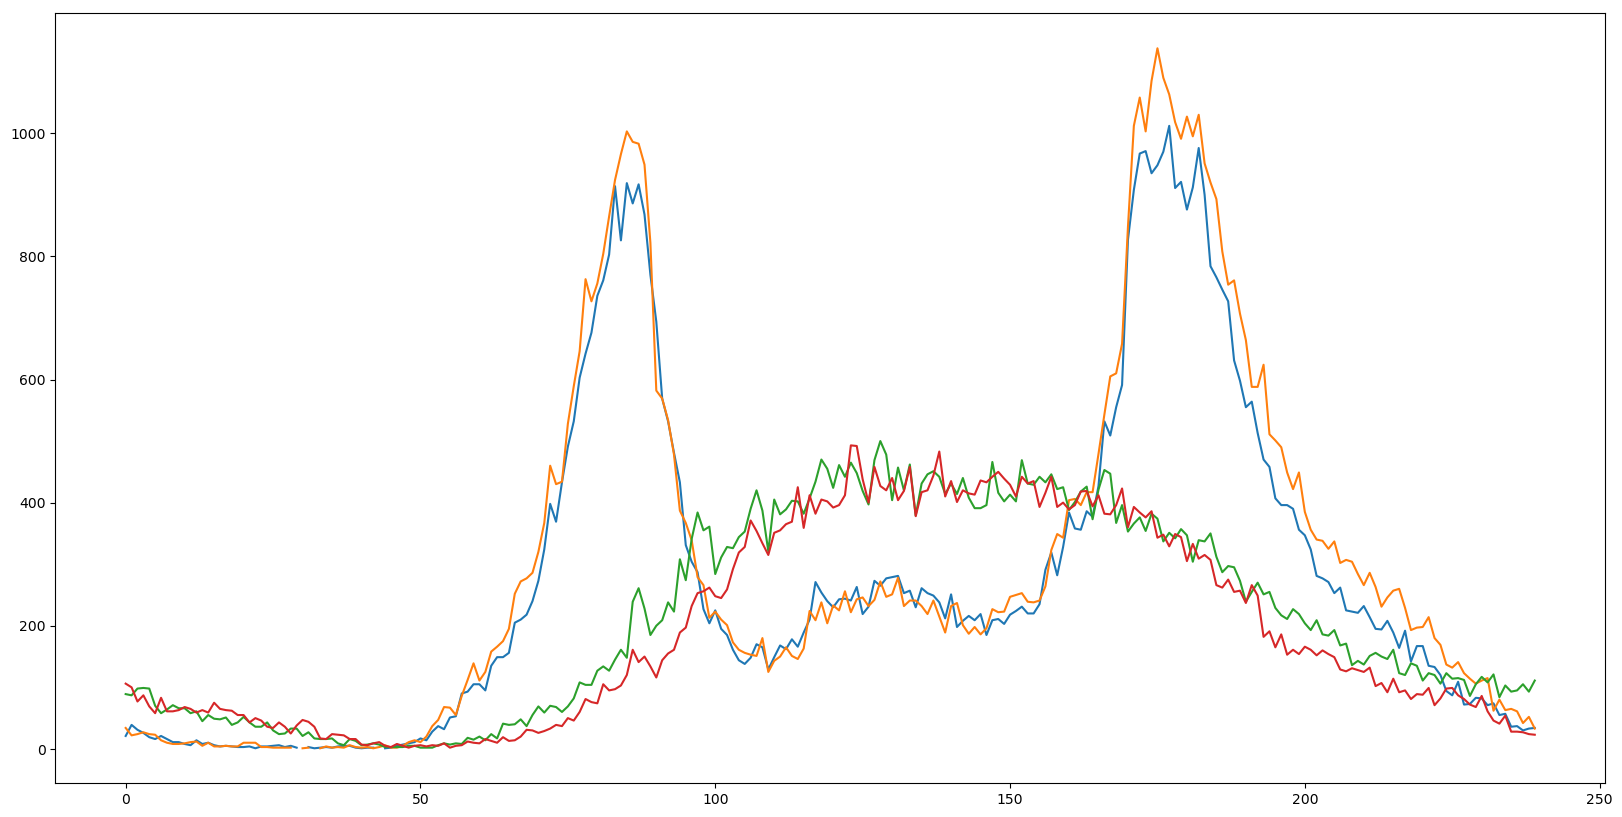

In [4]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["monday"])
plt.plot(day_hour_count.index, day_hour_count["tuesday"])
#plt.plot(day_hour_count.index, day_hour_count["wednesday"])
plt.plot(day_hour_count.index, day_hour_count["saturday"])
plt.plot(day_hour_count.index, day_hour_count["sunday"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# Alex Yerg's Answer:

For the weekdays and weekend, the best recommended model was the polynomial set at 15 degrees and 5 degrees, respectively. However, its likely that we have overfitted our models for both the weekday and weekend models, and neither models would provide reliable predicted values.  

After identifying the best model among the 3 polynomials with respect to the weekdays and weekend, we used 2 methods to train and test our model. For the 1st method, we did not use the sklearn package "model selection", and the 2nd we used the package. 

The first method resulted in a poor model which we can see in both the plots for Monday/Tuesday and Sat/Sunday (see plots below). The plots show predicted values from our models diverge away from the actual values that we excluded when training our models. Additionally, I compared the effect of excluding 5 and 10 data points when training the model. Our MSE, MAE, MAPE are all lower values when I excluded more data points suggesting a better model; however, the opposite is likely true due to creating poor models where we are overfitting the data. 

For the second method where we used the "selection model" package, we see that the model is not diverging away from the actual values; and the MSE, MAE, and MAPE are lower than the MSE, MAE and MAPE values from the first method. However, the 2nd method excluded 20% of the data points randomly instead of excluding the last set of data points which is likely the reason for the result of a better model. I would suggest fine tuning and testing the model to deterine if we overfit it. 


# 1. Using the **`day_hour_count`** dataframe create 4 dataframes `monday`, `tuesday`, `saturday` and `sunday` that represent the data for those days. (hint: Monday is day=0)

In [5]:
# removed NULL values and reset index to correctly model
monday = day_hour_count[["hour","monday"]].dropna().reset_index(drop = True).copy()
tuesday = day_hour_count[["hour","tuesday"]].dropna().reset_index(drop = True).copy()
saturday = day_hour_count[["hour","saturday"]].dropna().reset_index(drop = True).copy()
sunday = day_hour_count[["hour","sunday"]].dropna().reset_index(drop = True).copy()


## 2a. Create 3 models fit to (`x=hour`, `y=monday`)  with varying polynomial degrees ( choose from `n=5,15,20`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

### Monday

Text(0.5, 1.0, 'Scattor plot of Monday w/Linear Regression: x5 = Blue, x15 = Yellow, x20 = Red')

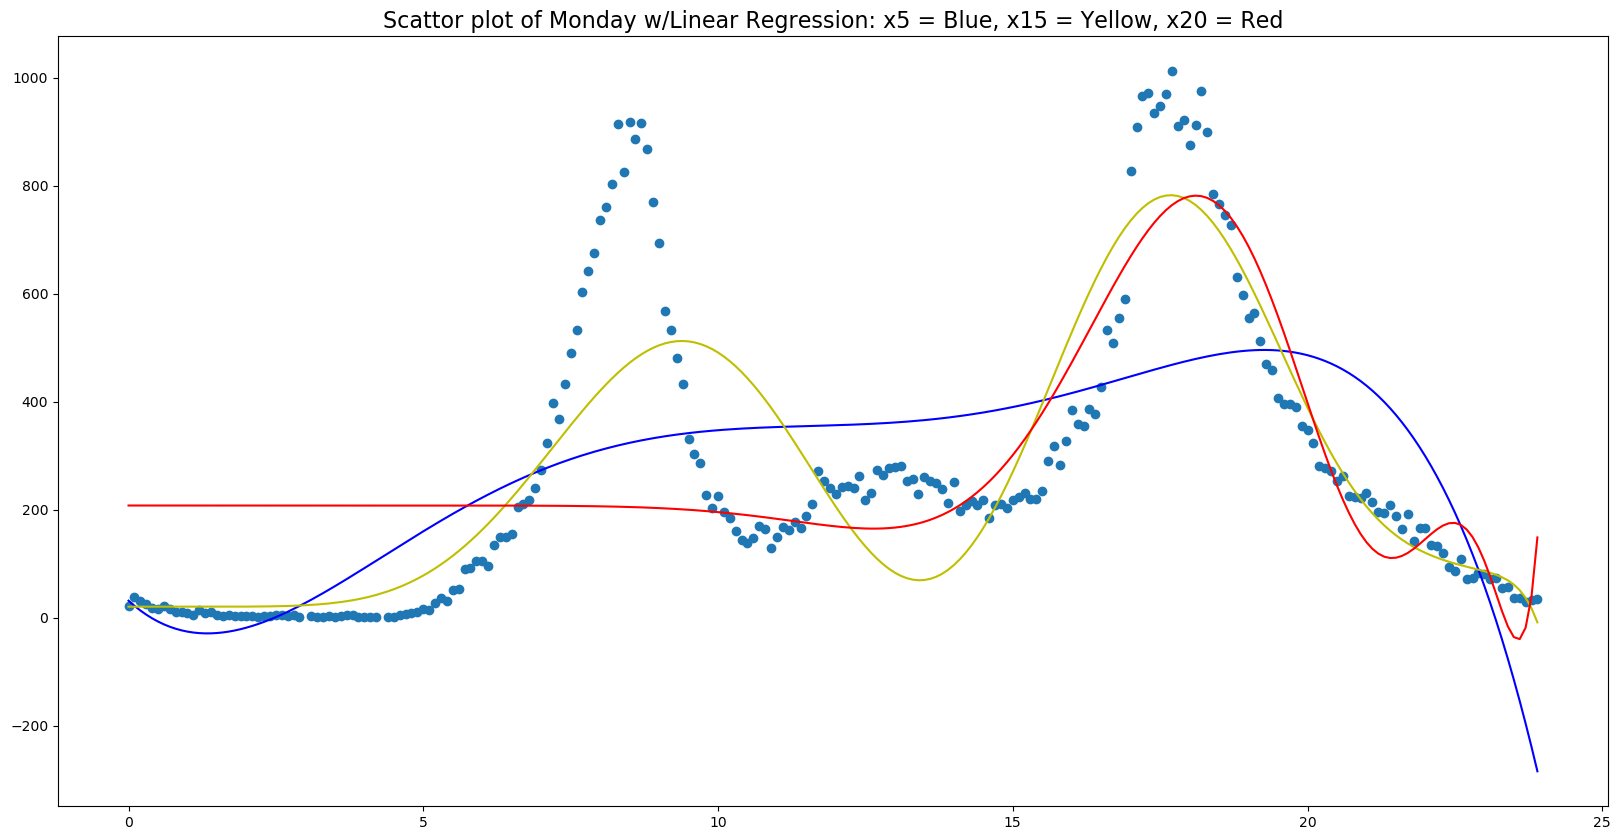

In [6]:
# import packages
from sklearn import linear_model, metrics
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

# plot data
#sns.scatterplot(x="hour", y="monday",data=monday)

# reshape input data
x_mon = np.array(monday["hour"]).reshape(-1, 1)
y_mon = np.array(monday["monday"])

############################ LINEAR MODEL, n = 5
# fit and transform POLY
poly5 = PolynomialFeatures(degree=5)
x5 = poly5.fit_transform(x_mon)

# fit linear reg model
linear5 = linear_model.LinearRegression()
linear5.fit(x5, y_mon)

############################ LINEAR MODEL, n = 15
# fit and transform POLY
poly15 = PolynomialFeatures(degree=15)
x15 = poly15.fit_transform(x_mon)

# fit linear reg model
linear15 = linear_model.LinearRegression()
linear15.fit(x15, y_mon)


############################ LINEAR MODEL, n = 20
# fit and transform POLY
poly20 = PolynomialFeatures(degree=20)
x20 = poly20.fit_transform(x_mon)

# fit linear reg model
linear20 = linear_model.LinearRegression()
linear20.fit(x20, y_mon)


########################### plot data
plt.scatter(x_mon, y_mon)
plt.plot(x_mon, linear5.predict(x5), c='b')
plt.plot(x_mon, linear15.predict(x15), c='y')
plt.plot(x_mon, linear20.predict(x20), c='r')
plt.title('Scattor plot of Monday w/Linear Regression: x5 = Blue, x15 = Yellow, x20 = Red', fontsize=16)


## 2b. Repeat `2a` for `saturday`

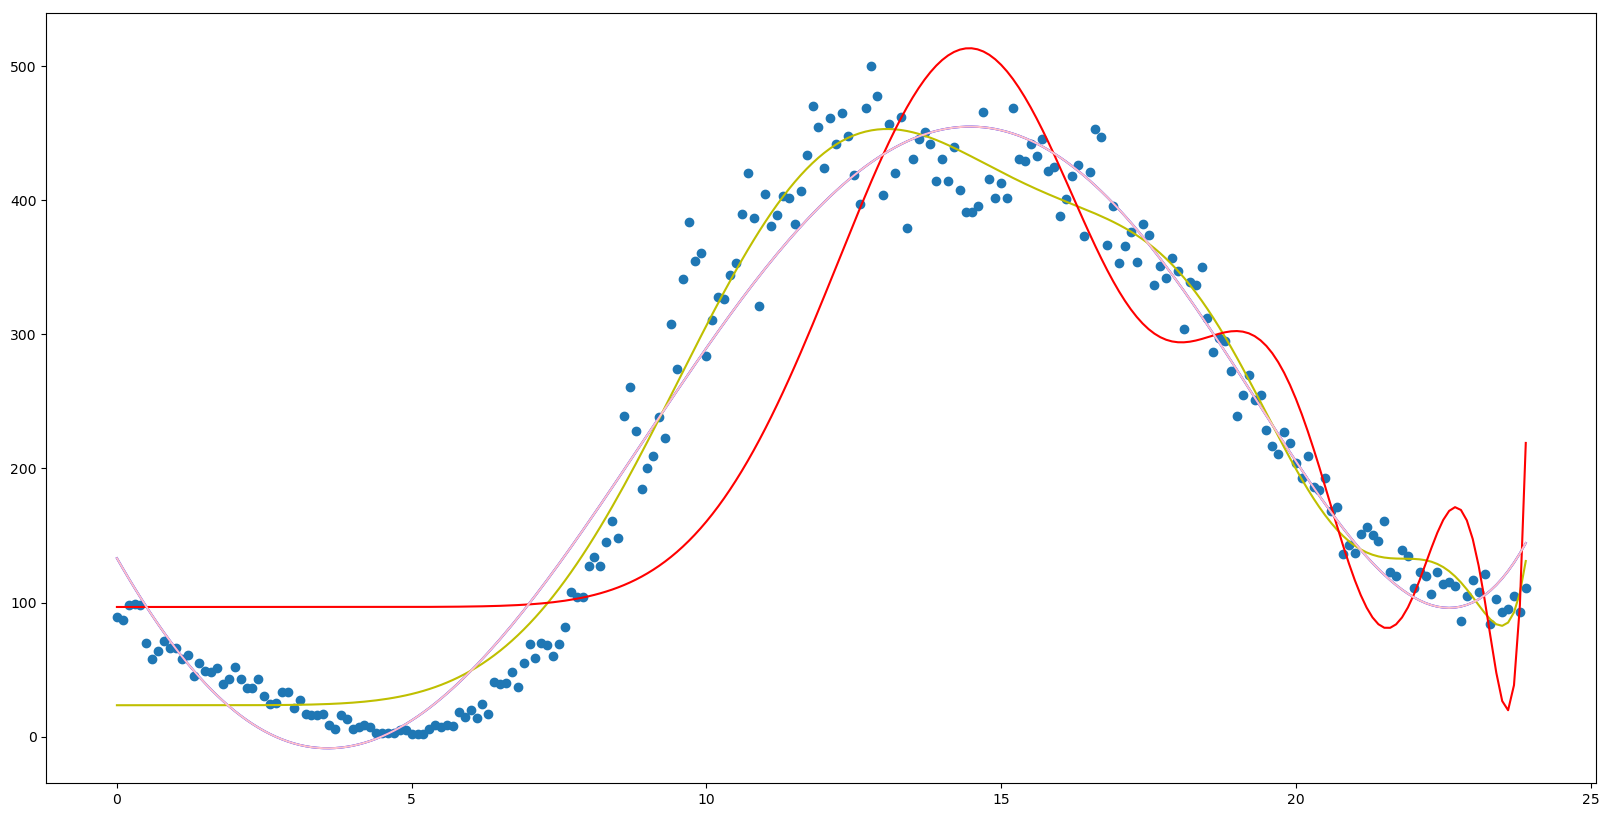

In [23]:

# reshape input data
x_sat = np.array(saturday["hour"]).reshape(-1, 1)
y_sat = np.array(saturday["saturday"])

############################ LINEAR MODEL, n = 5
# fit and transform POLY
poly5 = PolynomialFeatures(degree=5)
x5 = poly5.fit_transform(x_sat)

# fit linear reg model
linear5 = linear_model.LinearRegression()
linear5.fit(x5, y_sat)

############################ LINEAR MODEL, n = 15
# fit and transform POLY
poly15 = PolynomialFeatures(degree=15)
x15 = poly15.fit_transform(x_sat)

# fit linear reg model
linear15 = linear_model.LinearRegression()
linear15.fit(x15, y_sat)


############################ LINEAR MODEL, n = 20
# fit and transform POLY
poly20 = PolynomialFeatures(degree=20)
x20 = poly20.fit_transform(x_sat)

# fit linear reg model
linear20 = linear_model.LinearRegression()
linear20.fit(x20, y_sat)


########################### plot data
plt.scatter(x_sat, y_sat)
plt.plot(x_sat, linear5.predict(x5), c='b')
plt.plot(x_sat, linear15.predict(x15), c='y')
plt.plot(x_sat, linear20.predict(x20), c='r')


## 3. Using the best `monday` model's prediction, determine the errors (MSE, MAE, MAPE) between the prediction with the `monday` and `tuesday` datasets

## Repeat for `saturday`/`sunday`


##  Monday/Tuesday

(-100, 1050)

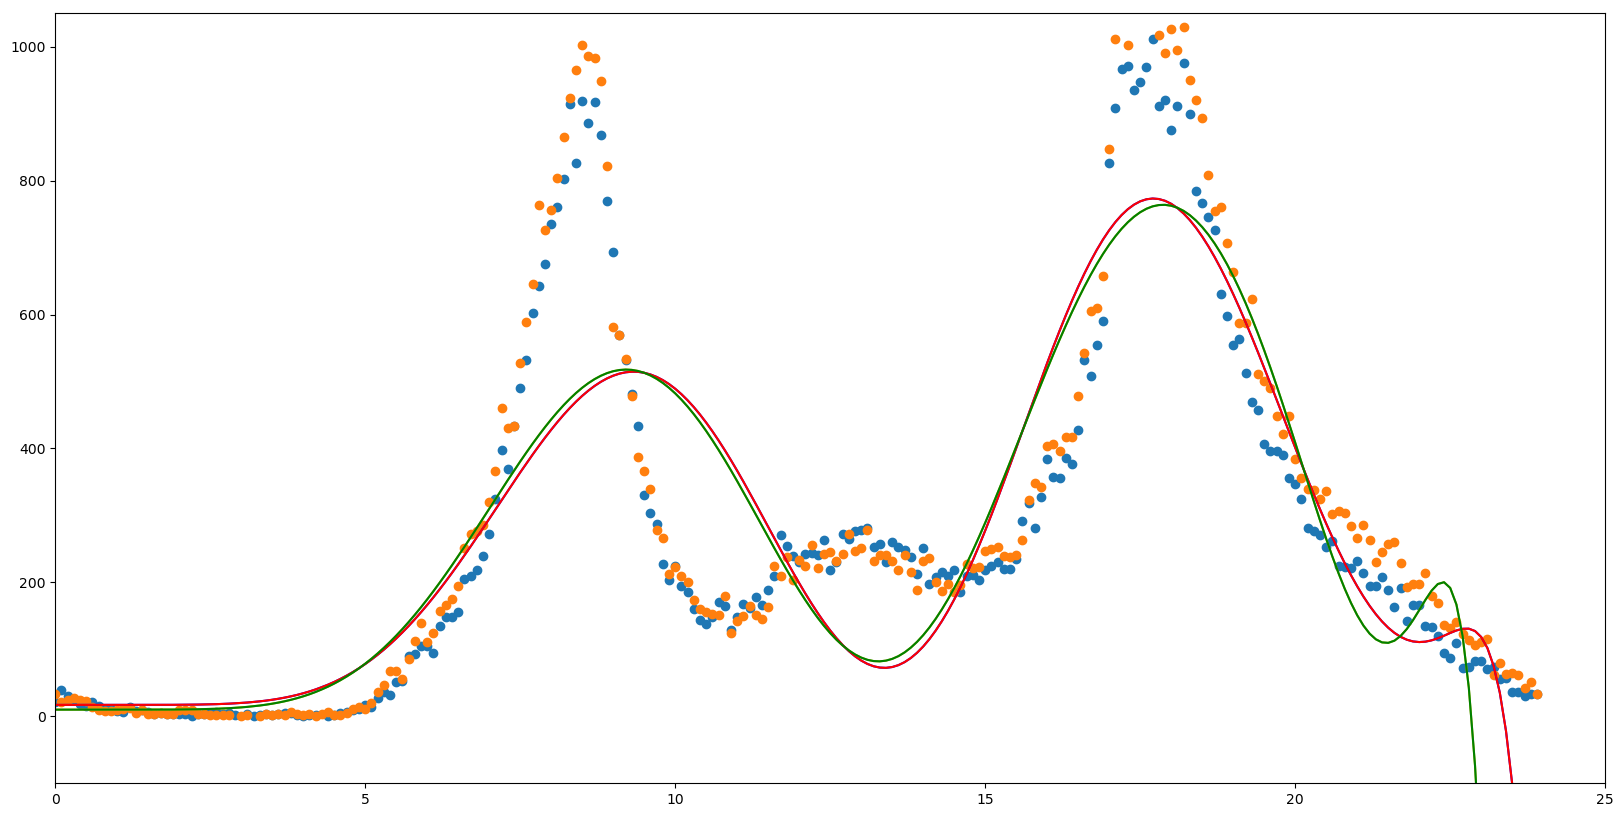

In [49]:
#Monday/Tuesday

# Use monday's model to test monday & tuesday data

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> BEST LINEAR MODEL, n = 15

# initiate linear regression model
linear15 = linear_model.LinearRegression()
linear15_2 = linear_model.LinearRegression()


####################  Determine performance of model, 1st visually, then 2nd by using MSE, MAE, MAPE

# ============================================== MONDAY

# ------------   REPEATED STEP DUE TO REUSING x15 for other "Days" ------------
# fit and transform POLY
x15 = poly15.fit_transform(x_mon)
# ------------------------------------------------------------------------------

# create models from test-set of Monday data
linear15.fit(x15[:-5], y_mon[:-5])
linear15_2.fit(x15[:-10], y_mon[:-10])


# ============================================== Tuesday

# reshape input data
x_tue = np.array(tuesday["hour"]).reshape(-1, 1)
y_tue = np.array(tuesday["tuesday"])

# fit and transform POLY
x15_tue = poly15.fit_transform(x_tue)

# create test set from Tuesday data
#linear15.fit(x15_tue[:-5], y_tue[:-5])
#linear15_2.fit(x15_tue[:-10], y_tue[:-10])


########################################## check visually with plot
# Monday plot
plt.scatter(x_mon,y_mon)
plt.plot(x_mon, linear15.predict(x15), c='b')
plt.plot(x_mon, linear15_2.predict(x15), c='y')


# Tuesday plot
plt.scatter(x_tue,y_tue)
plt.plot(x_tue, linear15.predict(x15_tue), c='r')
plt.plot(x_tue, linear15_2.predict(x15_tue), c='g')

plt.xlim(0, 25) 
plt.ylim(-100, 1050)

In [50]:
# Monday & Tuesday 

# ------------------------- MSE
mon_mse_5 = metrics.mean_squared_error(y_mon[-5:], linear15.predict(x15[-5:]))
mon_mse_10 = metrics.mean_squared_error(y_mon[-10:], linear15.predict(x15[-10:]))
tue_mse_5 = metrics.mean_squared_error(y_tue[-5:], linear15.predict(x15_tue[-5:]))
tue_mse_10 = metrics.mean_squared_error(y_tue[-10:], linear15.predict(x15_tue[-10:]))


# ------------------------- MAE
mon_mae_5 = metrics.mean_absolute_error(y_mon[-5:], linear15.predict(x15[-5:]))
mon_mae_10 = metrics.mean_absolute_error(y_mon[-10:], linear15.predict(x15[-10:]))
tue_mae_5 = metrics.mean_absolute_error(y_tue[-5:], linear15.predict(x15_tue[-5:]))
tue_mae_10 = metrics.mean_absolute_error(y_tue[-10:], linear15.predict(x15_tue[-10:]))


# ------------------------- MAPE
mon_mape_5 = metrics.mean_absolute_percentage_error(y_mon[-5:], linear15.predict(x15[-5:]))
mon_mape_10 = metrics.mean_absolute_percentage_error(y_mon[-10:], linear15.predict(x15[-10:]))
tue_mape_5 = metrics.mean_absolute_percentage_error(y_tue[-5:], linear15.predict(x15_tue[-5:]))
tue_mape_10 = metrics.mean_absolute_percentage_error(y_tue[-10:], linear15.predict(x15_tue[-10:]))


# Print MSE, MAE, MAPE
print("Monday MSE for last 5 data points:", mon_mse_5)
print("Tuesday MSE for last 5 data points:", tue_mse_5)
print("Monday MAE for last 5 data points:", mon_mae_5)
print("Tuesday MAE for last 5 data points:", tue_mae_5)
print("Monday MAPE for last 5 data points:", mon_mape_5)
print("Tuesday MAPE for last 5 data points:", tue_mape_5)


print("Monday MSE for last 10 data points:", mon_mse_10)
print("Tuesday MSE for last 10 data points:", tue_mse_10)
print("Monday MAE for last 10 data points:", mon_mae_10)
print("Tuesday MAE for last 10 data points:", tue_mae_10)
print("Monday MAPE for last 10 data points:", mon_mape_10)
print("Tuesday MAPE for last 10 data points:", tue_mape_10)


Monday MSE for last 5 data points: 237240.81724648984
Tuesday MSE for last 5 data points: 247376.193030448
Monday MAE for last 5 data points: 425.9873913718907
Tuesday MAE for last 5 data points: 442.5873913718907
Monday MAPE for last 5 data points: 12.765619892389754
Tuesday MAPE for last 5 data points: 10.36232348021417
Monday MSE for last 10 data points: 119514.52278436781
Tuesday MSE for last 10 data points: 124653.65486533381
Monday MAE for last 10 data points: 229.75261544997088
Tuesday MAE for last 10 data points: 237.66263999662684
Monday MAPE for last 10 data points: 6.647376071340625
Tuesday MAPE for last 10 data points: 5.4117438323883835


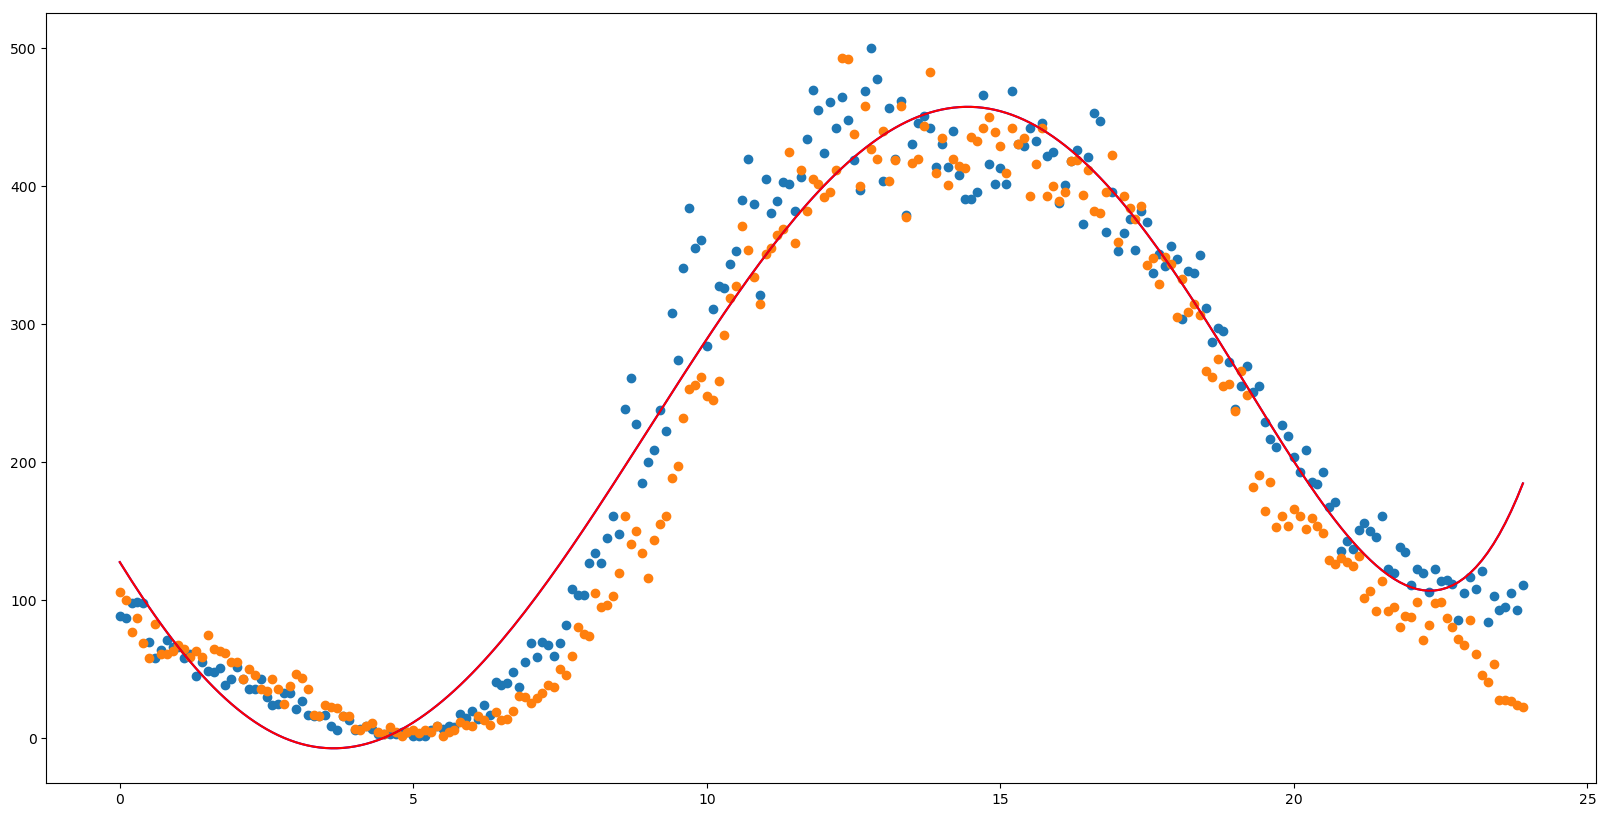

In [51]:
#Saturday/Sunday

# Use sat's model to test with sat & sunday data
# Best Saturday Model: n = 5


# initiate linear regression model
linear5 = linear_model.LinearRegression()
linear5_2 = linear_model.LinearRegression()


####################  Determine performance of model, 1st visually, then 2nd by using MSE, MAE, MAPE

# ============================================== Saturday

# ------------   REPEATED STEP DUE TO REUSING x5 for other "Days" ------------
# fit and transform POLY
x5_sat = poly5.fit_transform(x_sat)
# ------------------------------------------------------------------------------

# create model from test-set of Saturday data
linear5.fit(x5_sat[:-5], y_sat[:-5])


# ============================================== Sunday

# reshape input data
x_sun = np.array(sunday["hour"]).reshape(-1, 1)
y_sun = np.array(sunday["sunday"])

# fit and transform POLY
x5_sun = poly5.fit_transform(x_sun)

# create model test set from Tuesday data
#linear5_2.fit(x5_sun[:-5], y_sun[:-5])


########################################## check visually with plot
# Monday plot
plt.scatter(x_sat,y_sat)
plt.plot(x_sat, linear5.predict(x5_sat), c='b')


# Tuesday plot
plt.scatter(x_sun,y_sun)
plt.plot(x_sun, linear5.predict(x5_sun), c='r')



In [52]:
# Sat & Sun 

# ------------------------- MSE
sat_mse_5 = metrics.mean_squared_error(y_sat[-5:], linear5.predict(x5_sat[-5:]))
sun_mse_5 = metrics.mean_squared_error(y_sun[-5:], linear5.predict(x5_sun[-5:]))


# ------------------------- MAE
sat_mae_5 = metrics.mean_absolute_error(y_sat[-5:], linear5.predict(x5_sat[-5:]))
sun_mae_5 = metrics.mean_absolute_error(y_sun[-5:], linear5.predict(x5_sun[-5:]))


# ------------------------- MAPE
sat_mape_5 = metrics.mean_absolute_percentage_error(y_sat[-5:], linear5.predict(x5_sat[-5:]))
sun_mape_5 = metrics.mean_absolute_percentage_error(y_sun[-5:], linear5.predict(x5_sun[-5:]))


# Print MSE, MAE, MAPE
print("Sat MSE for last 5 data points:", sat_mse_5)
print("Sun MSE for last 5 data points:", sun_mse_5)

print("Sat MAE for last 5 data points:", sat_mae_5)
print("Sun MAE for last 5 data points:", sun_mae_5)

print("Sat MAPE for last 5 data points:", sat_mape_5)
print("Sun MAPE for last 5 data points:", sun_mape_5)


Sat MSE for last 5 data points: 4474.535648814189
Sun MSE for last 5 data points: 19705.791357802467
Sat MAE for last 5 data points: 66.17540385287407
Sun MAE for last 5 data points: 139.57540385287408
Sat MAPE for last 5 data points: 0.6684065079170256
Sun MAPE for last 5 data points: 5.45134012206968


## 4. With `saturday`, use `train_test_split` to create training and test sets and build a model. Create predictions using the xtest from and determine the errors between these predictions and the ytest (MSE, MAE, MAPE).

## repeat for `monday`

In [33]:
# import package
from sklearn.model_selection import train_test_split

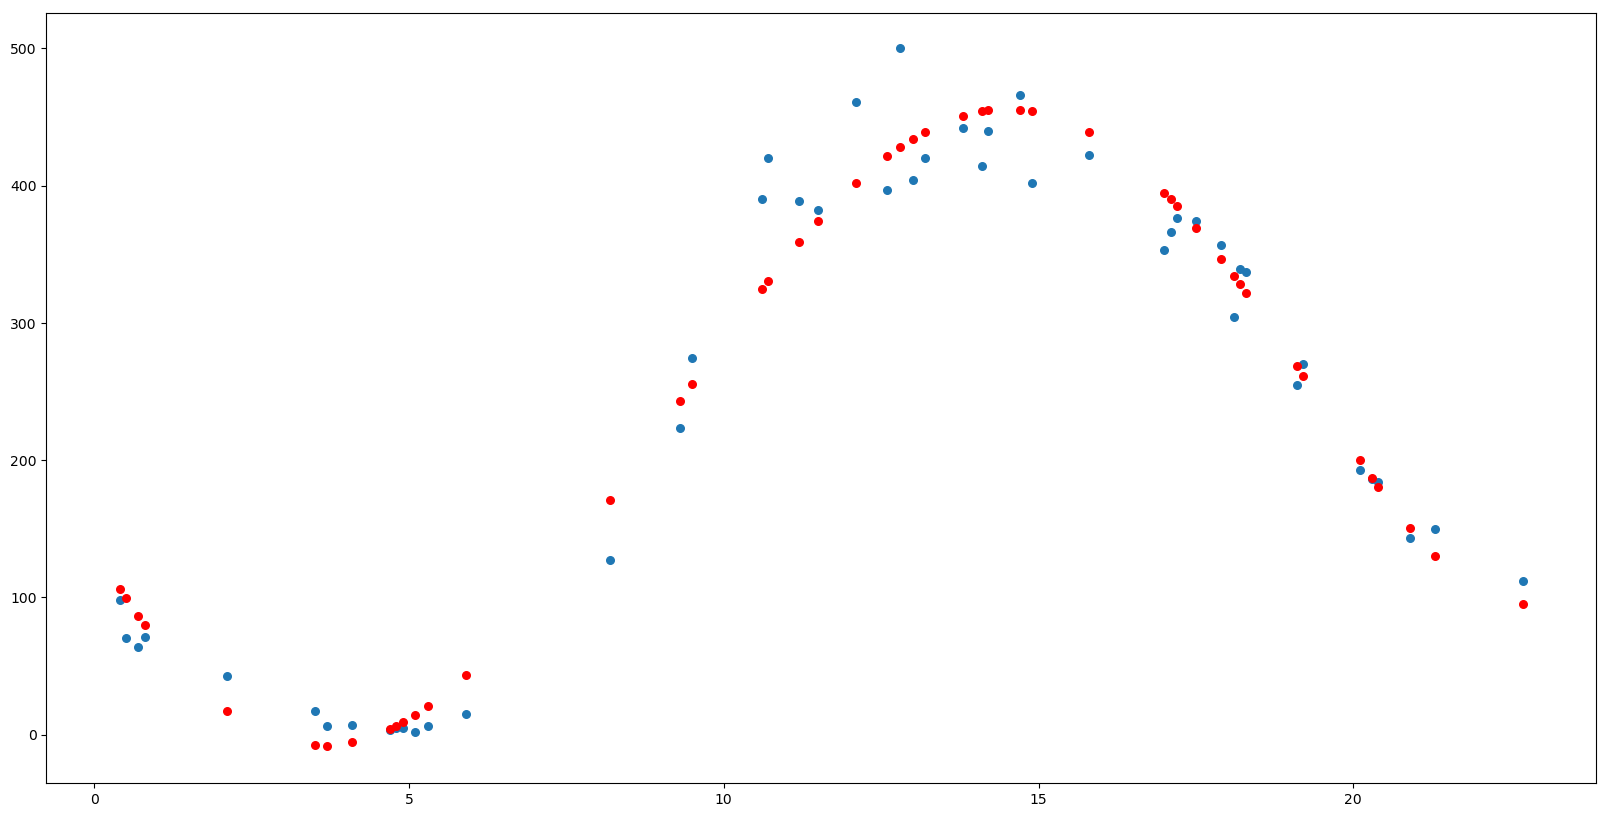

In [53]:
################# Sat 
xtrain, xtest, ytrain, ytest = train_test_split(x_sat, y_sat, test_size=0.2)
xtrain5 = PolynomialFeatures(degree=5).fit_transform(xtrain)
xtest5 = PolynomialFeatures(degree=5).fit_transform(xtest)
linear5 = linear_model.LinearRegression().fit(xtrain5, ytrain)

size = 30
plt.scatter(xtest, ytest, s=size)
plt.scatter(xtest, linear5.predict(xtest5), c='r', s=size)

In [54]:
################### Sat
(
    metrics.mean_squared_error(ytest, linear5.predict(xtest5)), 
    metrics.mean_absolute_error(ytest, linear5.predict(xtest5)),
    metrics.mean_absolute_percentage_error(ytest, linear5.predict(xtest5))
                                
)

(845.2641579941727, 21.944898410896755, 0.45181137211035227)

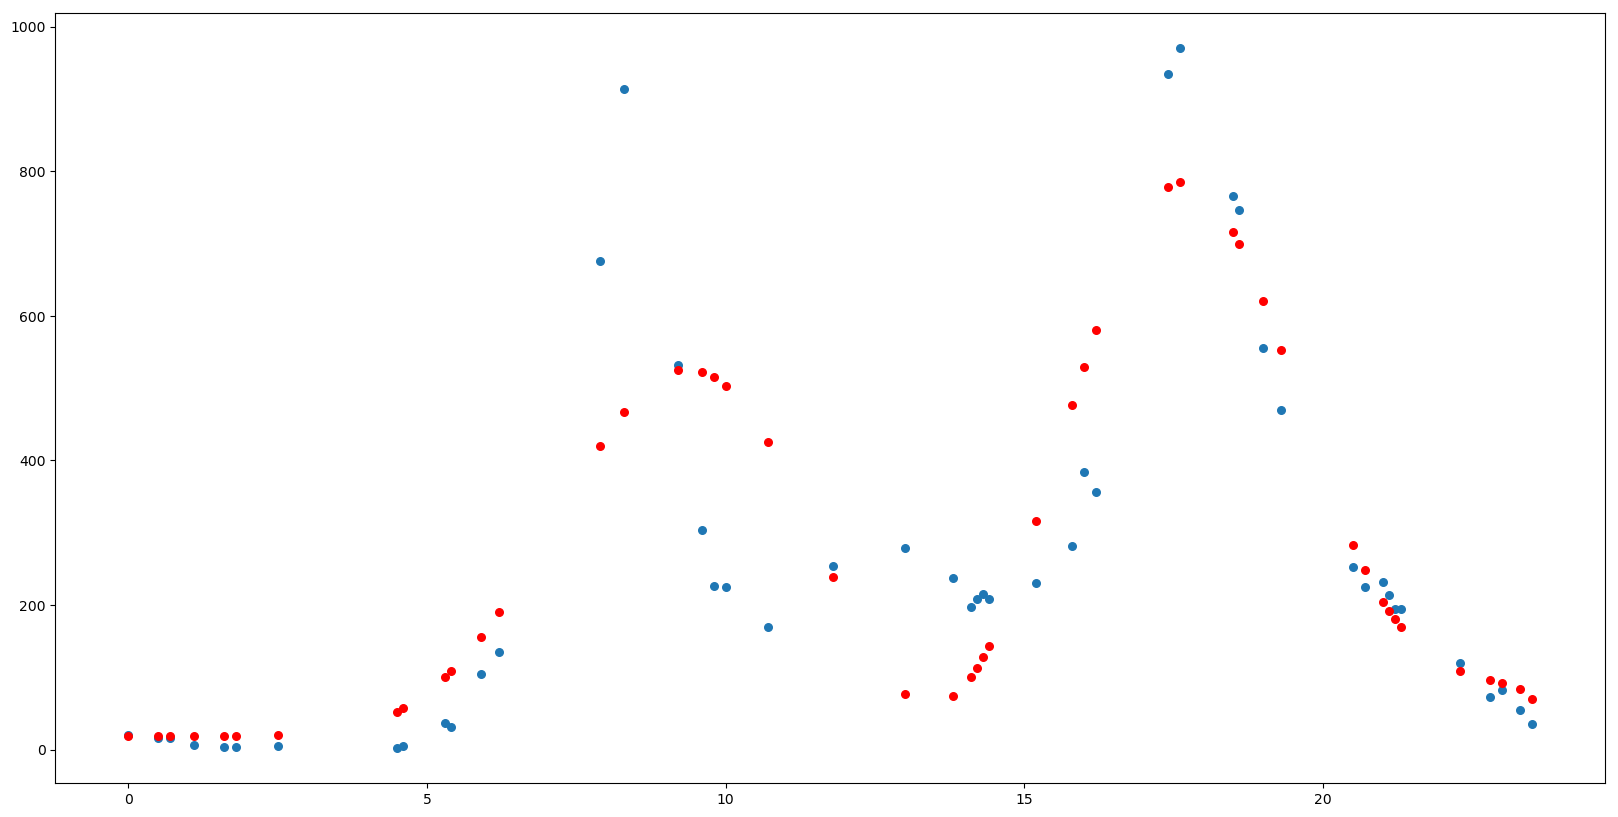

In [55]:
##################### Monday
xtrain, xtest, ytrain, ytest = train_test_split(x_mon, y_mon, test_size=0.2)
xtrain15 = PolynomialFeatures(degree=15).fit_transform(xtrain)
xtest15 = PolynomialFeatures(degree=15).fit_transform(xtest)
linear15 = linear_model.LinearRegression().fit(xtrain15, ytrain)

size = 30
plt.scatter(xtest, ytest, s=size)
plt.scatter(xtest, linear15.predict(xtest15), c='r', s=size)

In [56]:
################### Mon
(
    metrics.mean_squared_error(ytest, linear15.predict(xtest15)), 
    metrics.mean_absolute_error(ytest, linear15.predict(xtest15)),
    metrics.mean_absolute_percentage_error(ytest, linear15.predict(xtest15))
                                
)

(17860.090746546084, 91.26903537416366, 1.4264670044305852)